In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing
import obspy as ob

In [2]:
files =[]
for i in ['1', '2']:
    for alpha in ['y','o']:
        for k in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']:
            files.append('f'+i+alpha+k)
print(files)

path = 'physionet.org/files/fantasia/1.0.0/'

['f1y01', 'f1y02', 'f1y03', 'f1y04', 'f1y05', 'f1y06', 'f1y07', 'f1y08', 'f1y09', 'f1y10', 'f1o01', 'f1o02', 'f1o03', 'f1o04', 'f1o05', 'f1o06', 'f1o07', 'f1o08', 'f1o09', 'f1o10', 'f2y01', 'f2y02', 'f2y03', 'f2y04', 'f2y05', 'f2y06', 'f2y07', 'f2y08', 'f2y09', 'f2y10', 'f2o01', 'f2o02', 'f2o03', 'f2o04', 'f2o05', 'f2o06', 'f2o07', 'f2o08', 'f2o09', 'f2o10']


## Extrapolate data from the files
### my understanding is that the first column are  the repiratory data, meanwhile the second one is the one we are interested in

physionet.org/files/fantasia/1.0.0/f1y01


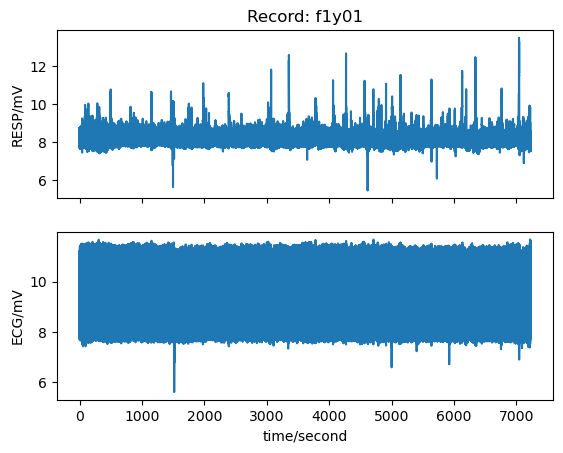

In [3]:
name = path+files[0]
print(name)
rec = wfdb.io.rdrecord(name)
wfdb.plot_wfdb(rec)

In [ ]:
annotations = wfdb.io.rdann(name, extension='dat')

In [ ]:
RR = processing.ann2rr(name, extension='ecg')

In [ ]:
print(RR)
plt.plot(np.arange(len(RR)), RR/250.)

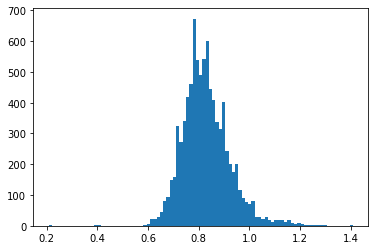

In [35]:
plt.hist(RR/250., bins=int(np.sqrt(len(RR))));

In [5]:
df = pd.DataFrame()

In [6]:
for name in files:
    df = pd.concat([df, pd.DataFrame({name : wfdb.rdrecord(path+name).p_signal[:,1]})], axis=1 )

In [7]:
dfy  = df[files[:10]]
dfy.describe()

,f1y01,f1y02,f1y03,f1y04,f1y05,f1y06,f1y07,f1y08,f1y09,f1y10
count,1.806271e+06,1.808383e+06,1.818368e+06,1.808223e+06,1.829599e+06,1.805678e+06,1.808538e+06,1.822943e+06,1.805119e+06,1.810783e+06
mean,8.172194e+00,8.176829e+00,8.176380e+00,8.174589e+00,8.157168e+00,8.187781e+00,8.162781e+00,8.193317e+00,8.194909e+00,8.180276e+00
std,5.121412e-01,3.578111e-01,4.548484e-01,4.537218e-01,5.637757e-01,4.338948e-01,6.505901e-01,4.213142e-01,4.333164e-01,5.041707e-01
min,5.616000e+00,7.148000e+00,5.908000e+00,6.016000e+00,0.000000e+00,0.000000e+00,4.416000e+00,6.028000e+00,2.556000e+00,5.944000e+00
25%,7.912000e+00,7.992000e+00,7.936000e+00,7.956000e+00,7.812000e+00,8.032000e+00,7.884000e+00,7.980000e+00,8.004000e+00,7.956000e+00
50%,7.992000e+00,8.060000e+00,8.036000e+00,8.016000e+00,8.060000e+00,8.116000e+00,8.000000e+00,8.096000e+00,8.116000e+00,8.040000e+00
75%,8.176000e+00,8.180000e+00,8.228000e+00,8.176000e+00,8.316000e+00,8.260000e+00,8.176000e+00,8.260000e+00,8.268000e+00,8.188000e+00
max,1.168000e+01,1.146000e+01,1.217600e+01,1.103200e+01,1.638000e+01,1.638000e+01,1.449200e+01,1.260400e+01,1.233200e+01,1.535600e+01
